In [20]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision.models import ResNet50_Weights
import spacy
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import numpy as np
import os, io, json
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms

In [23]:
root_dir = "/Users/keenansamway/Documents/GitHub/COSC576-Project/"
captions_file = "datasets/flickr8k/captions.txt"

In [24]:
df = pd.read_csv(os.path.join(root_dir, captions_file))

In [25]:
df.head()

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


In [6]:
len(df)

40455

In [26]:
df1 = df.groupby('image')['caption'].apply(list).reset_index(name="caption")

In [14]:
df1

,image,captions
0,1000268201_693b08cb0e.jpg,[A child in a pink dress is climbing up a set ...
1,1001773457_577c3a7d70.jpg,"[A black dog and a spotted dog are fighting, A..."
2,1002674143_1b742ab4b8.jpg,[A little girl covered in paint sits in front ...
3,1003163366_44323f5815.jpg,[A man lays on a bench while his dog sits by h...
4,1007129816_e794419615.jpg,[A man in an orange hat starring at something ...
...,...,...
8086,990890291_afc72be141.jpg,[A man does a wheelie on his bicycle on the si...
8087,99171998_7cc800ceef.jpg,"[A group is sitting around a snowy crevasse .,..."
8088,99679241_adc853a5c0.jpg,[A grey bird stands majestically on a beach wh...
8089,997338199_7343367d7f.jpg,"[A person stands near golden walls ., a woman ..."


In [27]:
train, validate, test = np.split(df1.sample(frac=1, random_state=42), [int(.8*len(df1)), int(.9*len(df1))])

In [28]:
train = train.explode('caption').reset_index(drop=True)
validate = validate.explode('caption').reset_index(drop=True)
test = test.explode('caption').reset_index(drop=True)

In [29]:
train.to_feather(os.path.join(root_dir, "datasets/flickr8k/captions_train.feather"))
validate.to_feather(os.path.join(root_dir, "datasets/flickr8k/captions_validate.feather"))
test.to_feather(os.path.join(root_dir, "datasets/flickr8k/captions_test.feather"))

In [7]:
df['length'] = df['caption'].apply(lambda row: len(row.strip().split()))

In [8]:
df.head()

,image,caption,length
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...,18
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .,8
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .,9
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...,10
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...,13


(0.0, 100.0)

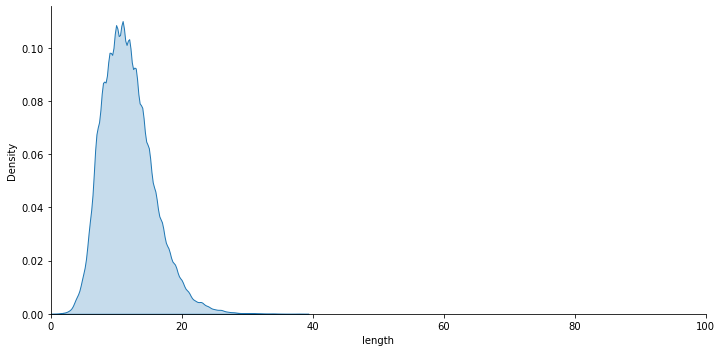

In [9]:
sns.displot(data=df, x='length', palette='mako', kind='kde', fill=True, aspect=2)
plt.xlim(0, 100)